# 캐글 마스터에게 배우기
- 이장에서는 XGBoost를 사용해 캐글 대회에서 우승한 캐글 마스터의 팁과 기법을 배워보겠다.
- 여기에서 캐글 대회에 참가하지는 않겠지만 일반적으로 강력한 머신러닝 모델을 만드는 데 적용할 수 있는 기술을 얻게 될 것이다.
- 특히 추가적인 홀드아웃 세트가 중요한 이유, 평균 인코딩으로 새로운 특성을 만드는 특성공학, VotingClassifier와 VotingRegressor를 사용해 상관관계가 낮은 머신러닝 앙상블을 만드는 방법, 최종 모델을 위해 스태킹을 사용하는 장점에 대해 배우겠다.
- 이장에서는 다음과같은 내용을 다룬다.
---
- 캐글 대회 둘러보기
- 새로운 특성  만들기

- 상관관계가 낮은 앙상블
- 스태킹

# 9.1 캐글 대회 둘러보기
- XGBoost는 캐글 대회에서 비교할 수 없는 성공을 거두어 최고의 머신러닝 알고리즘으로 명성을 얻었다.
- XGBoost는 신경망을 사용하는 딥러닝 모델과 함께 우승 솔루션의 앙상블에 자주 등장한다.
- 캐글 대회에서 xGBoost를 사용해 우승한 사례는 DMLC 깃허브에서 볼 수 있다. 더 많은 목록을 보려면 캐글 대회 우승 솔루션 노트북을 참고하자.
---

- 5장에서 언급했듯이 캐글 대회는 머신러닝 기술자들이 최고의 점수를 내고 상금을 받기 위해 경정해는 머신러닝 대회이다.
- XGBoost가 2014년 힉스 보손 대회에 등장했을 때 바로 리더보드에 오르며 캐글대회에서 가장 인기있는 머신러닝 알고리즘 중 하나가 되었다.
---
- 2014년~2018년 사이에 이미자나 텍스트 같이 비구조적인 데이터가 아니라 행과 열로 구성된 테이블 형태의 데이터를 사용한 대회에서 XGBoost는 지속적으로 다른 알고리즘을 앞섰다. 2017년 초고속 그레이디언트 부스팅의 마이크로소프트 버전인 LightGBM의 등장으로 XGBoost는 테이블 데이터에서 진짜 경쟁을 하게 되었다.

- 캐글 대회에서 XGBoost나 LightGBM같은 훌륭한 머신러닝 알고리즘을 사용하는 것으로 충분하지 않다. 비슷하게 모델의 하이퍼파라미터를 튜닝하는 것도 충분하지 않은 경우가 많다. 개별 모델의 예측이 중요하지만 

- 캐글 대회에서 XGBoost나 lightGBM 같은 훌륭한 머신러닝 알고리즘을 사용하는 것으로 충분하지 않다.
- 비슷하게 모델의 하이퍼파라미터를 튜닝하는 것도 충반하지 않은 경우가 많다.
- 개별 모델의 예측이 중요하지만 더 높은 성능을 달성하기 위해 새로운 특성을 만들고 최적의 모델을 결합하는 것도 중요하다.

## 9.1.2 캐글 대회
- 앙상블과 스태킹 같은 기술이 널리 퍼진 이유를 이해하기 위해 캐글 대회의 구조를 알아볼 필요가 있다. 또한 캐글 대회의 구조를 알면 나중에 대회에 참가할 때 도움이된다.
- 캐글은 기초에서 고급 대회로 넘어가려는 참가자들에게 <Housing Prices: Advanced Regression> 대회를 추천한다. 상금이 주어지지 않지만 많은 지식을 요하는 대회 중 하나다.
- 캐글 웹사이트에서 경연 대회가 열린다. 2015년 <AVito Context Ad Clicks>대회는 XGBoost 사용자 오웬 장이 우승했다. 오웬 장을 비롯하여 XGBoost를 사용한 캐글 대회 우승자는 2015년부터 있었다. 이는 2016년 티엔치 첸의 논문이 나오기 전에 이미 XGBoost가 널리 사용되었다는 뜻이다.
- 캐글 대회 페이지에는 다음과 같은 탭이 제공된다.
    - overview 탭 옆에는 이 대회의 데이터를 담고 있는 data 탭이 있다.
    - Notebooks 탭에는 캐글 사용자가 올린 솔루션과 스타터 노트북이 있다.
    - Discussion 탭에는 질문과 답변이 있다.
    - Leaderboard 탭에는 가장 높은 점수를 받은 참가자가 출력된다.
    - Rules 탭은 대회 운영 방식을 설명한다.
    - 추가적으로 오른쪽에 있는 Late Submisson 링크는 대회가 끝난 후에도 솔루션을 제출할 수 있다는 것을 나타낸다.
    
데이터를 다운로드하려면 무료 계정으로 가입하고 대회에 참가해야 하낟. 데이터는 일반적으로 두 개의 데이터셋으로 나뉘어져 있다.
모델을 만드는 데 사용하는 훈련세트와 모델을 평가하는 데 사용하는 테스트 세트인 test.csv이다. 모델을 제출한 후 공개 리더보드에서 점수를 확인할 수 있다. 대회가 끝나면 최종 모델을 비공개 테스트 세트에서 평가하여 우승 솔루션을 결정한다.
    

## 9.1.3 홀드아웃 세트
- 캐글 대회에서 머신러닝 모델을 만드는 것과 자신의 모델을 만드는 것 사이의 차이점이 있다.
- 지금까지 모델이 잘 일반화되는지 확인하기 위해 데이터셋을 훈련 세트와 테스트 세트로 나누었다.
- 캐글 대회에서는 경쟁 환경에서 모델이 테스트되어야 한다. 이런 이유로 테스트 세트는 기본적으로 숨겨져 있다.
- 캐글의 훈련세트와 테스트 세트의 차이점이다.
    - training.csv: 모델을 훈련하고 평가하는 데 사용한다. 새로운 데이터에 잘 일반화될 수 있는 모델을 만들기 위해 train_test_split()나 cross_val_score()함수를 사용하여 훈련 세트를 훈련 세트와 테스트 세트로 나눈다. 훈련하는 동안 사용되는 이 테스트 세트를 모델을 검증하는 데 사용하기 때문에 종종 검증 세트라고 부른다.
    - test.csv: 별도의 홀드아웃 세트이다. 이 테스트 데이터를 사용해 이전에 본 적 없는 데이터에서 모델의 최종 성능을 평가한다. 이 테스트 세트의 목적은 공정한 경쟁을 위해서다. 이 테스트 데이터는 참가자에게 숨겨져 있고 모델을 제출한 후에만 결과를 확인할 수 있다.
 ---
- 연구나 제품을 위해 모델을 만들 때 검증 세트를 별로 떼어 놓는 것이 언제나 좋다. 이미 사용한 데이터를 사용해 모델을 테스트하면 검증 세트에 과대적합될 가능성이 있다. 캐글 대회에서 참가자가 공개 리더보드에서 순위를 올리기 위해 수천 분의 1의 정확도에 집착할 때 이런일이 일어난다.
---
- 캐글 대회의 홀드아웃 세트는 실제 상황을 반영한다. 머신러닝 모델을 만드는 목적은 본적 없는 데이터에서 정확한 예측을 만드는 것이다. 예를 드어 훈련 세트에서 100% 정확도를 달성했지만 본 적 없는 데이터에서 50%를 달성했다면 이 모델은 그다지 유용하지 않을 것이다.
- 검증세트로 모델을 검증하는 것과 홀드아웃 세트로 모델을 테스트하는 차이는 중요하다.
- 다음은 머신러닝 모델을 검증하고 테스트하는 일반적인 방법이다.
> 데이터를 훈련세트와 테스트(홀드아웃)세트로 나눈다.: 테스트 세트를 따로 보관하고 보고 싶은 유혹을 참자.
> 훈련 세트를 더 작은 훈련세트와 검증세트로 나누거나 교차검증을 사용하자: 훈련 세트에서 새로운 모델을 훈련하고 검증 세트로 모델을 검증하는 과정을 반복한다.
> 최종 모델을 만든 후에 테스트 세트로 모델을 평가한다.: 이것이 진짜 모델 평가이다. 점수가 기대보다 낮다면 단계2로 돌아가 반복하자. 테스트 세트를 새로운 검증 세트로 사용해 하이퍼파라미터를 수정하지 않는 것이 중요하다. 이렇게 하면 모델이 테스트 세트에 맞춰지게 되어 테스트 세트의 목적이 무색하게 된다.

- 캐글 대회에서 검증 세트에 너무 가깝게 맞춰진 머신러닝 모델은 잘 동작하지 않을 것이다. 
- 캐글은 테스트 세트를 공개와 비공개용으로 나누는 경우가 많다.
- 공개 테스트 세트를 사용해 참가자는 모델의 점수를 확인하여 개선하고 다시 모델을 제출할 수 있다.
- 비공개 테스트 세트는 대회가 끝날때까지 공개되지 않는다. 공개 테스트 세트에 대한 순위를 볼 수 있지만 대회 우승자는 비공개 테스트 세트에 대한 결과를 기반으로 선정된다.
---
- 따라서 캐글 대회에서 우승하려면 비공개 테스트 세트에서 최상의 점수를 얻어야 한다. 캐글 대회에서는 단 몇 십분의 1퍼센트 포인트도 중요하다. 이런 점수에 대한 집착 때문에 때로는 조롱을 받기도하지만 성능을 높이기 위해 혁신적인 머신러닝 기법을 만들기도 한다. 이장에서 소개하는 기술들을 이해하면 강력한 모델을 만들고 머신러닝을 전반적으로 이해하는 데 도움이 될 것이다.


# 9.2 특성 공학
- 많은 캐글러와 데이터 과학자는 연구와 특성 공학에 상당한 시간을 사용한다고 한다. 이 절에서 pandas를 사용해 특성 공학을 수행해보겠다.
---
## 9.2.1 특성 공학이란?
- 머신러닝 모델의 성능은 훈련하는 데이터에 영향을 받는다. 데이터가 불충분하면 강력한 머신러닝 모델을 만들 수 없다.
- 더 흥미로운 질문은 데이터를 개선할 수 있는지 여부다. 기존 특성에서 새로운 특성을 만드는 작업을 특성 공학이라 부른다.
- 문제는 특성공학을 수행해야 하는지가 아니라 특성 공학을 얼마나 많이 수행해야 하는지이다.

## 9.2.2 우버와 리프트 데이터
- 캐글은 경연 대회 외에도 우버와 리프트 택시요금 예측 데이터 같은 공개 데이터셋을 포함하여 많은 데이터셋을 호스팅한다.

In [1]:
# 1. 먼저 이 절에서 필요한 라이브러리와 모듈을 임포트하고 경고를 끈다.
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. 그다음 'cab_rides.csv'파일을 로드하고 처음 다섯 개 행을 출력한다. 빠르게 처리하기 위해 nrows를 10000으로 제한한다.
# 전체 행은 600,000개가 넘는다.
df = pd.read_csv('cab_rides.csv', nrows = 10000)
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


- 출력 내용을 보면 범주형 특성과 타임스탬프를 포함하여 열의 종류가 다양한 것을 알 수 있다.

### 누락된 값
- 항상 그렇듯이 어떤 계산을 수행하기 전에 먼저 누락된 값을 확인한다.

In [3]:
# 1. df.info()는 열의 종류에 대한 정보도 제공한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          10000 non-null  float64
 1   cab_type          10000 non-null  object 
 2   time_stamp        10000 non-null  int64  
 3   destination       10000 non-null  object 
 4   source            10000 non-null  object 
 5   price             9227 non-null   float64
 6   surge_multiplier  10000 non-null  float64
 7   id                10000 non-null  object 
 8   product_id        10000 non-null  object 
 9   name              10000 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 781.4+ KB


- 출력에서 볼 수 있듯이 price열의 Non-Null Count가 10,000 미만이므로 누락된 값이 있다.

In [4]:
# 2. 누락된 값 있는 행에서 어떤 정보를 얻을 수 있는지 확인하는 것이 좋다.
df[df.isna().any(axis = 1)]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
...,...,...,...,...,...,...,...,...,...,...
9949,1.08,Uber,1543272429665,North End,North Station,NaN,1.0,74fffcba-da67-42d1-b585-13d546a125be,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9953,2.46,Uber,1545045010035,Beacon Hill,Fenway,NaN,1.0,18c2e91d-d594-4a22-9be7-0a5829efa4bf,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9965,2.58,Uber,1544815809335,Beacon Hill,South Station,NaN,1.0,77adadfb-4ac7-4cdf-aeab-6c4cfe8f7b26,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9985,1.89,Uber,1544695512211,Beacon Hill,North End,NaN,1.0,f2dfa974-f9d1-4e90-a0e6-77f7eea16956,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


- 출력된 행에서 특별한 점은 없다. 아마도 택시 요금이 기록되지 않았을 수 있다.

In [5]:
# 3. Price열이 타깃이므로 Dropna()메서드와 Inplace =True 매개변수를 사용해 이 행들을 데이터프레임에서 삭제한다.
df.dropna(inplace=True)

- 그다음 df,isna()나 df.info()를 다시 사용하여 누락된 값이 있는지 확인할 수 있다.

### 특성공학 - 타임스탬프 데이터
- 타임스탬프는 종종 1970년 1월 1일부터 시간을 미리 초로 나타낸 유닉스 시간으로 표현된다. 타임스탬프 열에서 택시 요금을 예측하는 데 도움이 되는 특정 시간을 추출할 수 있다 .예를 들면 월, 날짜, 시간, 러시아워인지 등이다.

In [6]:
df['date'] = pd.to_datetime(df['time_stamp'])
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223


- 뭔가 문제가 있다. 이 분야 전문가가 아니더라도 우버와 리프트가 1970년도에 없었다는 것은 누구나 알 수 있다. 소수점 아래 자릿수가 변환에 문제가 있다는 증거다.(타임스탬프 단위는 밀리 초이므로 소숫점 아래 세자리 이후는 0으로 출력되어 햔다.)

In [7]:
# 2. 몇 번의 곱셈으로 적절한 변환을 찾은 후 10**6을 곱해서 원하는 값을 얻었다.
df['date'] = pd.to_datetime(df['time_stamp']*(10**6))
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223


In [8]:
# 3. datetime 패키지를 임포트한 다음 date 열에서 month, hour, dayofweek 같은 새로운 열을 만들 수 있다.
import datetime as dt
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

In [9]:
# 4. 그다음 'dayofweek'가 5나 6인지 확인하여 주말 여부를 결정하는 함수를 작성한다.
def weekend(row):
    if row['dayofweek'] in [5,6]:
        return 1
    else:
        return 0

In [10]:
# 5. 이 함수를 데이터프레임에 적용하고 df['weekend']열을 만든다.
df['weekend'] = df.apply(weekend, axis = 1)

In [11]:
# 같은 방식으로 시간이 오전 6~10시와 오후 3~7시(15~19시)인지 확인하여 러시아워인지 확인하는 함수를 만든다.
# 평일 이시간이 바쁘니까
def rush_hour(row):
    if( row['hour'] in [6,7,8,9,15,16,17,18]) & (row['weekend'] ==0):
      return 1
    else:
      return 0 

In [12]:
# 7. 이 함수를 데이터프레임에 적용하여 'rush_hour'열을 만든다.
df['rush_hour'] = df.apply(rush_hour, axis = 1)

In [13]:
# 8. df.tail() 메서드로 마지막 다섯 개 행을 출력하여 새로 만든 열의 값을 확인한다.
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0


### 새로운 시간 특성을 만드는 과정을 계속 수행할 수 있다.
- 새로운 특성을 많이 만들 때 새로운 특성 사이에 강한 상관관계가 있는지 검토할 필요가 있다.
- 상관관계에 대해 알아보자.
---
- 시간 데이터에 대해서 특성 공학을 수행하는 과정을 연습했으니 범주형 열로 특성 공학을 적용해 보자.

## 특성공학 - 범주형 데이터
- 이전에 pd.get_dummies()함수로 범주형 열을 수치형 열로 바꾸었다. 사이킷런의 OneHotEncoder를 사용해서도 범주형 데이터를 0과 1로 이루어진 희소 행렬로 변환할 수 있다. 이 클래스는 10장에서 사용해보겠다. 이런 방식을 사용해 범주형 데이터를 수치형으로 바꾸는 것이 일반적이지만 다른 방법도 있다.
---
- 범주형 특성에서 0은 없음을 1은 있음을 나타내기 때문에 숫자값으로 의미가 있지만 다른 방식의 값이 더 나은 결과를 제공할 수 있다.
---
- 한가지 방법은 각 범주가 나타난 빈도로 범주형 특성을 변환하는 것이다. 따라서 범주형 특성에 있는 각 범주가 백분률로 변환된다. 그럼 범주형 값을 숫자 값으로 변환해보겠다.

In [14]:
# 1. value_counts() 메서드를 사용해 빈도를 확인한다.(어떤 택시가 많이 오는지)
df['cab_type'].value_counts()

Uber    4654
Lyft    4573
Name: cab_type, dtype: int64

In [15]:
# 2. groupby()메세더를 사용해 새로운 열에 저장할 횟수를 카운트를 계산한다. df.groupby(column_name)으로 그룹바이하고
# [column_name].transform()메서드로 집계한 내용을 새로운 열에 저장할 수 있다.
df['cab_freq'] = df.groupby('cab_type')['cab_type'].transform('count')
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour,cab_freq
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890,12,9,6,1,0,4573
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677,11,2,1,0,0,4573
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198,11,1,2,0,0,4573
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749,11,4,4,0,0,4573
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223,11,3,3,0,0,4573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1,4654
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0,4654
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0,4654
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0,4654


In [16]:
# 새로운 열을 전체 행 개수로 나누어 빈도를 계산한다.
df['cab_freq'] = df['cab_freq']/len(df)

In [17]:
df.tail()

# 짜잔 범주형이 특성공학으로 수치형이 되었어요

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour,cab_freq
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1,0.504389
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0,0.504389
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0,0.504389
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0,0.504389
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0,0.495611


## 캐글 팁 - 평균 인코딩
- 캐글 대회에서 자주 사용되는 평균 인코딩 또는 타깃 인코딩이라 부르는 특성공학 방법으로 이절을 마무리하겠다.
---
- 평균 인코딩은 범주형 특성을 타깃 값의 평균을 기반으로 수치 특성으로 변환한다. 예를 들어, 오렌지 색 중에서 7개가 타깃 1이고 3개가 타깃 0이면 평균 인코딩 특성은 7/10 = 0.7이 된다. 타깃 값 사용으로 데이터누수가 있기 때문에 추가적인 규제가 필요하다.
---
- 데이터 누수는 훈련 세트와 테스트 세트 또는 특성과 타깃 사이에 정보가 공유될 때 일어난다.
- 여기서는 타깃이 특성 데이터에 직접적으로 영향을 미치기 때문에 위험하다.
- 일반적으로 머신러닝에서 이는 나쁜 방법이다.
- 그럼에도 불구하고 평균 인코딩은 놀라운 성능을 낸다는 것이 입증되었다.
- 실전에서 평균 값의 분포가 비슷할 때 잘 동작한다. 과대적합의 가능성을 줄이기 위해 규제를 추가한다.


- 편리하게도 사이킷런과 호환되는 TargetEncoder 클래스로 평균 인코딩을 처리할 수 있다.

In [18]:
!pip install category_encoders

In [19]:
# 1. 먼저 category_encoders 패키지를 설치하고 categort_encoders 모듈에서 TargetEncoder 클래스를 임포트한다.
from category_encoders.target_encoder import TargetEncoder

In [20]:
# 2. TargetEncoder 클래스 객체를 만든다.
encoder = TargetEncoder() 

In [21]:
# 3. 마지막으로 인코드이 fit_transform()메서드로 평균 인코딩을 만들어 새로운 열로 추가한다. 
# 변경될 특성과 타깃을 매개변수에 포함시킨다.
df['distance_mean'] = encoder.fit_transform(df['destination'], df['price'])

In [22]:
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,month,hour,dayofweek,weekend,rush_hour,cab_freq,distance_mean
9995,3.05,Uber,1543504379037,Fenway,North Station,11.5,1.0,934d2fbe-f978-4495-9786-da7b4dd21107,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018-11-29 15:12:59.037,11,15,3,0,1,0.504389,17.696933
9996,3.05,Uber,1543800477997,Fenway,North Station,26.0,1.0,af8fd57c-fe7c-4584-bd1f-beef1a53ad42,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-12-03 01:27:57.997,12,1,0,0,0,0.504389,17.696933
9997,3.05,Uber,1543407083241,Fenway,North Station,19.5,1.0,b3c5db97-554b-47bf-908b-3ac880e86103,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 12:11:23.241,11,12,2,0,0,0.504389,17.696933
9998,3.05,Uber,1544896813623,Fenway,North Station,36.5,1.0,fcb35184-9047-43f7-8909-f62a7b17b6cf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-15 18:00:13.623,12,18,5,1,0,0.504389,17.696933
9999,2.03,Lyft,1543812781166,Theatre District,Northeastern University,7.0,1.0,7f0e8caf-e057-41eb-bdef-27eb14c88122,lyft_line,Shared,2018-12-03 04:53:01.166,12,4,0,0,0,0.495611,15.779349


- 맨 오른쪽에 cab_type_mean 열이 추가되었따.
- 평균 인코딩은 시도해볼 가치가 있다.

## 추가적인 특성 공학
- 여기서 멈춰야 할 이유는 없다. groupby()와 추가적인 인코더를 사용해 다른 열의 통계적 측정 값으로 특성 공학을 더 수행할 수 있다. 목적지와 출발지같은 범주형 특성은 위도와 경도로 바꾼다음 맨해튼 거리나 위경도를 고려한 빈센티 거리같은 새로운 거리측정단위로 변환할 수 있다.
---
- 캐글 대회에서 참가자들은 소수점 이하 몇 자리의 정확도를 더 얻기 위해 수천 개의 특성을 만든다. 많은 특성을 만들었다면 2장에서 소개한 feature_importances_속성을 사용해 가장 중요한 특성을 선택할 수 있다 .또한 높은 상관관계가 있는 특성을 삭제할 수도 있다.
---
- 이 택시 요금 데이터셋에서는 날씨 정보가 포함된 추가적인 csv파일이 있다. 하지만 이 파일이 없다면 어떨까? 해당 날짜에 대한 날씨 데이터를 찾아 직접 추가할 수 있다.
---
- 특성 공학은 모든 강력한 모델을 만들기 위해 데이터과학자에게 필수적인 기술이다.
- 여기서 다루는 전략은 일부에 불과하다. 특성 공학에는 연구, 실험, 도메인 전문 지식, 특성 표준화, 새로운 특성에 대한 모델 성능 피드백, 최적 특성 선정하기가 포함된다.
- 상관관계가 낮은 앙상블을 알아보자.

- 캐글 우승 모델이 개별 모델인 경우는 드물다. 거의 항상 앙상블을 사용한다. 앙상블이란 랜덤포레스트나 XGBoost같은 부스팅이나 배깅 모델만 의미하지 않고 XGBoost, 랜덤 포레스트, 그외 다른 모델을 포함하는 순수한 앙상블을 말한다. 
- 이절에서 정확도를 높이고 과대하적합을 막기 위해 상관관계가 낮은 앙상블을 만들어보겠다.

# 9.3.1 다양한 모델
- 유방암 환자인지 예측하는 데 사용하는 위스콘신 유방암 데이터셋은 569개 샘플과 30개 특성으로 이루어져 있다.
- 다음 단계를 따라 이 데이터셋에 여러 분류 모델을 적용해보겠다.

In [23]:
# 1. 사이킷런에서 load_breast_cancer()함수를 임포트한다.
from sklearn.datasets import load_breast_cancer

In [24]:
# 2. return_X_y = True로 설정하여 데이터를 특성 x와 타깃 y에 할당한다.
X, y = load_breast_cancer(return_X_y = True)

In [25]:
# 3. StratifiedKFold를 사용해 5-폴드 교차 검증을 준비한다.
kfold = StratifiedKFold(n_splits = 5)

In [26]:
# 4. 모델을 입력으로 받고 교차 검증 평균 점수를 반환하는 간단한 함수를 만든다.
def classification_model(model):
    scores = cross_val_score(model,X,y, cv=kfold)
    return scores.mean()

In [27]:
# 5. 여러 가지 기본 학습기를 사용하는 XGBoost, 랜덤 포레스트, 로지스틱 회귀 같은 여러 분류 모델을 적용한다.

# a) XGBoost
classification_model(XGBClassifier())

0.9771619313771154

In [28]:
# b) gblinear 기본 학습기를 사용하는 XGBoost
classification_model(XGBClassifier(booster = 'gblinear'))

0.968390001552554

In [29]:
# c) dart 기본 학습기를 사용하는 XGBoost
classification_model(XGBClassifier(booster='dart', one_drop =True))

# dart 부스터의 경우 one_drop = True로 지정하여 적어도 하나의 트리가 드롭아웃되도록 한다.

0.9736376339077782

In [30]:
# d) RandomForestClassifier
classification_model(RandomForestClassifier(random_state=2))

0.9666356155876418

In [31]:
# e) LogisticRegression
classification_model(LogisticRegression(max_iter=5000))

0.9507995652848935

- 대부분의 모델이 잘 동작하지만 XGBoost 분류기가 가장 높은 점수를 얻었다. gblinear 기본 학습기는 성능이 좋지 않기 때문에 사용하지 않겠다.
---
- 실제로 각 모델을 튜닝해야 한다. 여러 장에 걸쳐 하이퍼파라미터 튜닝에 대해 다루었으므로 여기서는 다루지 않겠다. 
- 하지만 하이퍼파라미터 튜닝에 대한 경험을 일부 변경된 값으로 모델을 빠르게 만드는 데 도움이 된다.
- 예를 들어 다음 코드처럼 XGBoost에서 max_depth를 2로 낮추고, n_estimators를 500으로 높이고, learning_rate를 0.1로 지정해볼 수 있다.

In [32]:
classification_model(XGBClassifier(n_estimators = 500, max_depth = 2, learning_rate=0.1))

0.9701133364384411

- 이 점수는 매우 좋다. 가장 높은 점수는 아니지만 앙상블에 도움이 될 수 있다.
- 다양한 모델을 준비했으므로 이들 사이의 상관관계를 알아보겠다.

## 9.3.2 상관관계
- 이절의 목표는 앙상블을 위해 모든 모델을 선택하는 것이 아니라 상관관계가 적은 모델을 고르는 것이다.
- 먼저 상관관계가 무엇인지 이해해보자.
- 상관관계는 두 변수 사이의 선형 관계의 강도를 나타내는 -1~1 사이의 통곗값이다. 상관관계가 1이면 완벽한 직선이고 상관관계가 0이면 선형 관계가 전혀 없다.
- 상관관계를 산점도로 표현한 그림을 보면 쉽게 이해할 수 있다. 
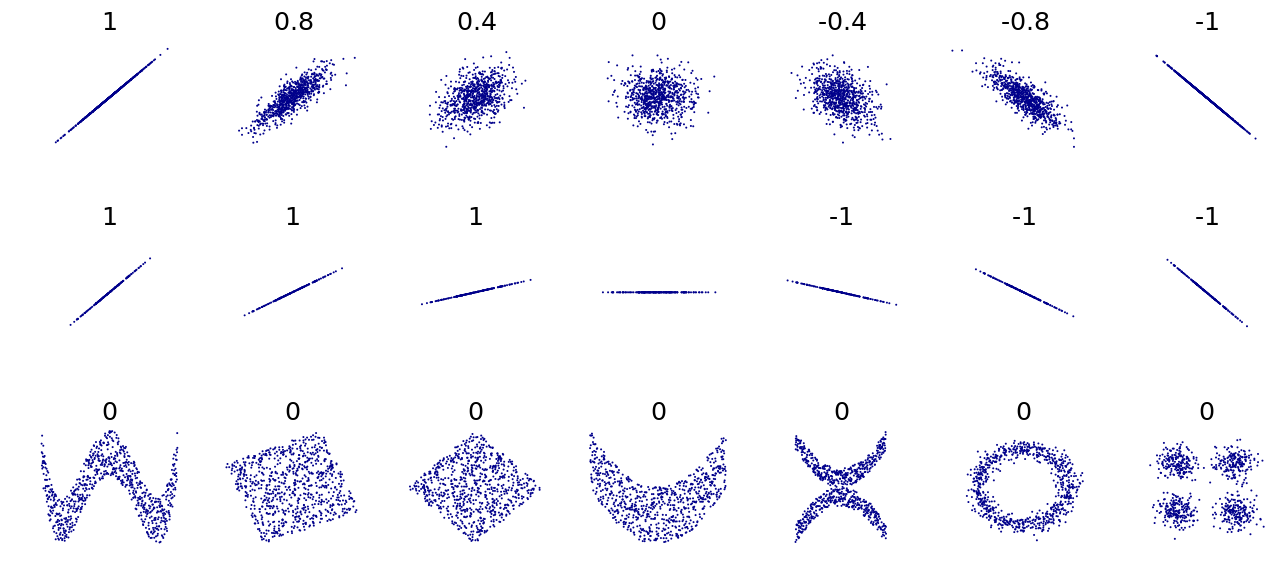

- 앤스컴 콰르텟(상관관계가 0.816인 네 개의 산점도)은 다음과 같다.
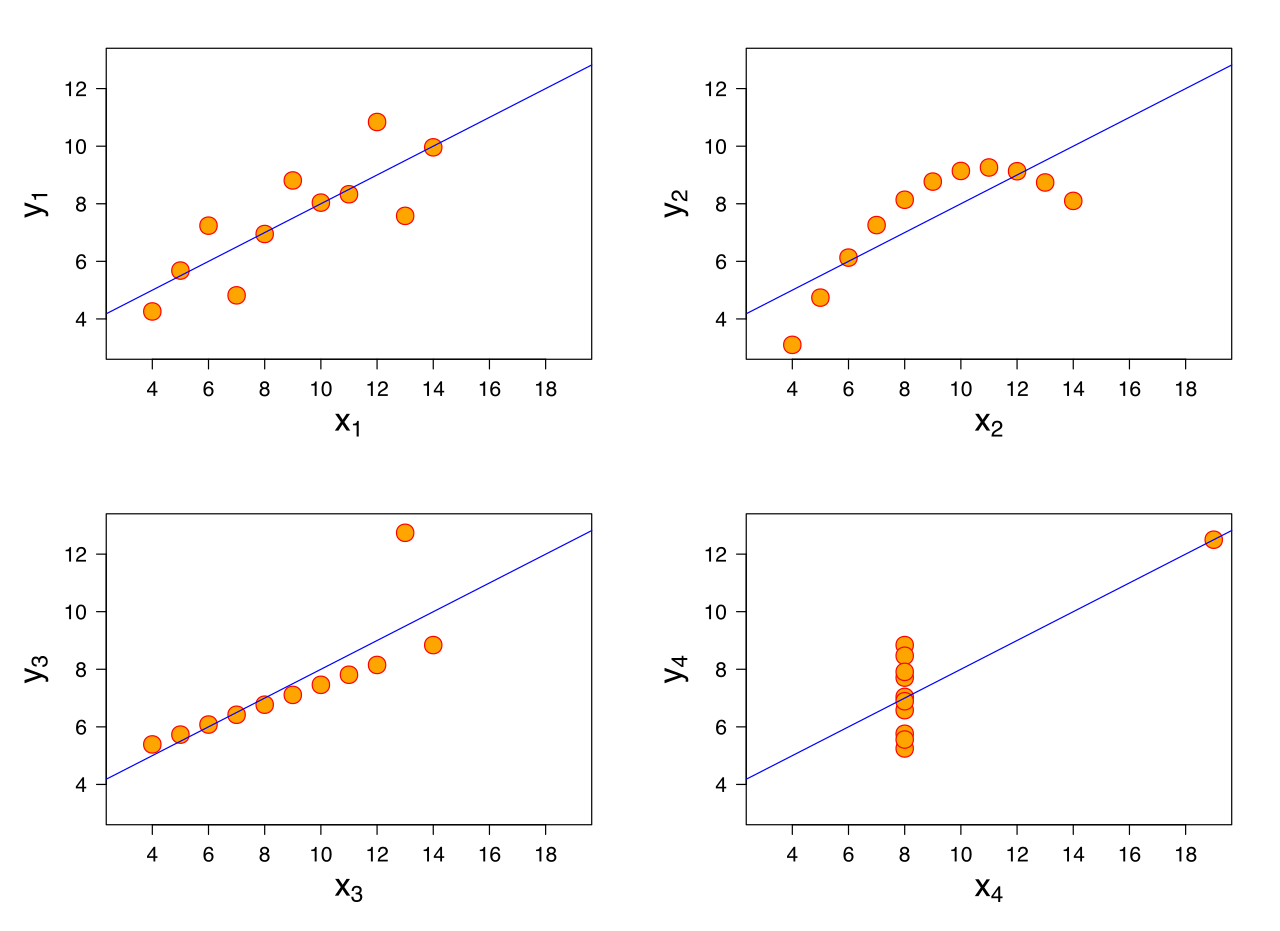
- 왼쪽 위 그래프는 높은 상관관계를 보여준다. 일반적으로 점들이 직선에 가깝게 모여있다.
- 오른쪽 위 그래프는 상관관계가 동일한 그래프의 점들이지만 크게 다르다. 
- 다른 말로 하면 상관관계는 가치있는 정보를 제공하지만 전체 내용을 설명하지는 못한다.
- 상관관계의 의미를 이해했으므로 머신러닝 모델을 만드는 데 상관관계를 적용해보자.

## 9.3.3 앙상블의 상관관계
- 앙상블에 포함시킬 모델을 선택해야 한다.
- 상관관계가 높은 머신러닝 모델은 앙상블에 포함되는 것이 바람직하지 않다. 왜일까?
- 각각 1,000개의 예측을 만드는 두개의 분류기를 생각해보자. 두 분류기가 모두 동일한 예측을 만드다면 두번째 분류기는 새로운 정보를 제공하지 못하므로 불필요하다.

- 다수결 방식을 사용하면 다수의 분류기가 실패했을 때만 예측이 실패한다. 
- 따라서 좋은 성능을 내지만 다른 예측을 만드는 다양한 모델을 가지는 것이 좋다.
- 대부분의 모델이 동일한 예측을 만든다면 상관관계가 높고 앙상블에 새로운 모델을 추가해서 얻는 이득이 적다.
- 강력한 모델이 서로 다르게 실패할 수 있는 것이 앙상블 모델의 결과를 더 좋게 만든다. 
- 상관관계가 적은 모델이 다른 예측을 만든다.
---
- 머신러닝 모델 간의 상관관계를 계산하려면 먼저 비교할 데이터가 필요하다. 머신러닝 모델이 만드는 예측을 이 데이터로 사용한다. 예측을 만든 후 이를 데이터프레임으로 연결하고 Corr() 메서드를 호출하여 한 번에 모든 상관관계를 구한다.

In [43]:
# 1. 각 머신러닝 모델의 예측을 반환하는 함수를 정의한다.
def y_pred(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(score)
    return y_pred

In [44]:
# 2. train_test_split() 함수로 훈련세트와 테스트세트를 준비한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [45]:
# a) XGBClassifier
y_pred_gbtree = y_pred(XGBClassifier())

0.951048951048951


In [46]:
# b) dart를 사용한 XGBClassifier
y_pred_dart = y_pred(XGBClassifier(booster = 'dart', on_drop = True))

[13:22:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "on_drop" } are not used.

0.951048951048951


In [47]:
# c) RandomForestClassifier
y_pred_forest = y_pred(RandomForestClassifier(random_state=2))

0.9370629370629371


In [50]:
# d) LogisiticRegression
y_pred_logistic = y_pred(LogisticRegression(max_iter = 10000))

0.9370629370629371


In [54]:
# e) 
y_pred_xgb = y_pred(XGBRFClassifier(max_depth =2, n_estimators = 500, learning_rate=0.1))

0.9300699300699301


In [57]:
# 4. np.c_함수(c는 concatenation의 약자이다.)를 사용해 예측 결과를 새로운 데이터프레임으로 연결한다.
df_pred = pd.DataFrame(data= np.c_[y_pred_gbtree, y_pred_dart, y_pred_forest, y_pred_logistic,
                                  y_pred_xgb], columns = ['gbtree','dart','forest','logistic','xgb'])

In [59]:
df_pred.corr()

,gbtree,dart,forest,logistic,xgb
gbtree,1.000000,1.000000,0.884584,0.914111,0.928143
dart,1.000000,1.000000,0.884584,0.914111,0.928143
forest,0.884584,0.884584,1.000000,0.943308,0.956927
logistic,0.914111,0.914111,0.943308,1.000000,0.900703
xgb,0.928143,0.928143,0.956927,0.900703,1.000000


- 여기서 볼 수 있듯이 모델 자기자신과의 상관관계는 완벽하게 선형이기 때문에 대각선에 있는 모든 값은 1.0이다. 다른 값은 모두 꽤 높다.
---
- 낮은 상관관계에 대한 명확한 기준은 없다. 상관관계 값과 사용한 모델의 개수에 따라 다르다.
- **이 예에서는 최상의 모델 xgb와 가장 상관관계가 적은 두 모델인 랜덤 포레스트와 로지스틱 회귀를 선택하겠다.**
---
- 사이킷런의 VotingClassifier 클래스를 사용해 선탣한 모델을 연결하여 하나의 앙상블 모델을 만들어보겠다.

## 9.3.4 VotingClassifier
- 사이킷런의 VotingClassifier 클래스는 여러 개의 분류 모델을 연결하고 다수결 투표를 사용하여 출력을 만든다. 여러 개의 회귀 모델을 앙상블하여 각 모델의 예측을 평균하는 VotingRegressor도 있다.
- 다음은 VotingClassifier 앙상블을 만드는 과정이다.

In [60]:
# 1. 빈 리스트를 만든다.
estimators = []

In [61]:
# 2. 첫 번째 모델을 만든다.
logistic_model = LogisticRegression(max_iter = 10000)

In [62]:
# 3. 모델을 (model_name, model)형식의 튜플로 리스트에 추가한다.
estimators.append(('logistic', logistic_model))

In [66]:
# 1. 빈 리스트를 만든다.
estimators = []
# 2. 첫 번째 모델을 만든다.
logistic_model = LogisticRegression(max_iter = 10000)
# 3. 모델을 (model_name, model)형식의 튜플로 리스트에 추가한다.
estimators.append(('logistic', logistic_model))

# 4. 필요한 만큼 단계 2와 3을 반복한다.
xgb_model = XGBClassifier(max_depth = 2, n_estimators = 500, learning_rate = 0.1)
estimators.append(('xgb',xgb_model))
rf_model = RandomForestClassifier(random_state=2)
estimators.append(('rf',rf_model))

In [67]:
# 5. 모델 리스트를 입력으로 사용해 VotingClassifier 객체를 초기화한다.
ensemble = VotingClassifier(estimators)

In [68]:
# 6. cross_val_score() 함수로 앙상블을 평가한다.
scores = cross_val_score(ensemble, X, y, cv=kfold)
print(scores.mean())

0.9771619313771154


- 상관관계가 낮은 머신러닝 앙상블을 만드는 목적과 기법을 이해했으니 이제 비슷하지만 장점이 많은 스태킹을 알아보겠다.

# 9.4 스태킹
- 가장 강력한 기법 중 하나인 스태킹을 알아보겠다.

## 9.4.1 스태킹이란?
- 스태킹은 두 개의 수준으로 머신러닝 모델을 결합한다. 기본 수준에서는 모델이 모든 데이터를 사용하여 예측을 만든다.
- 메타 수준에서는 베이스 모델의 예측을 입력으로 받아 최종 예측을 만든다.
---
- 다른 말로 하면 **스태킹에서 최종 모델은 원본 데이터를 입력으로 사용하지 않고 베이스 모델의 예측을 입력으로 사용한다.**
---
- 스태킹은 캐글 대회에서 큰 성공을 거두었다. 대부분의 캐글 대회는 개인과 팀이 서로 합칠 수 있는 합병 데드라인이 있다.
- 이런 합병을 통해 참가자들이 모델을 합치고 더 큰 앙상블을 만들 수 있기 때문에 개인보다 팀으로서 성공할 가능성이 있다.
---
- 스태킹은 최종적으로 예측을 결합하는 메타 모델로 인해 기본적인 앙상블과 구별된다.
- 메타모델은 예측을 입력으로 받기 때문에 회귀에서는 선형 회귀, 분류에서는 로지스틱 회귀같은 간단한 모델을 사용하는 것이 권장



## 9.4.2 StackingClassifier
- 다행히 사이킷런은 스태킹을 쉽게 구성할 수 있는 회귀와 분류용 클래스를 제공한다. 기본적인 아이디어는 이전 절의 앙상블 모델과 비슷하다. 다양한 베이스 모델을 선택하고 메타 모델로 선형 회귀나 로지스틱 회귀를 사용한다.
- 다음은 사이킷런으로 스태킹을 구현하는 과정이다.

In [69]:
# 1. 베이스 모델을 위한 빈 리스트를 만든다.
base_models = []

In [70]:
# 2. 베이스 모델을 (name,model)형식의 튜플로 리스트에 추가한다.
base_models.append(('lr', LogisticRegression()))
base_models.append(('xgb', XGBClassifier()))
base_models.append(('rf',  RandomForestClassifier(random_state=2)))

- 다수결 투표를 사용하지 않고 새로운 예측 데이터에 가중치를 적용하기 쉽기 때문에 스태킹에 더 많은 모델을 추가할 수 있다. 최적의 방법은 상관관계가 비교적 낮은 모델을 사용하고 다양한 조합을 실험하는 것이다.

In [71]:
# 3. 메타 모델을 선택한다. 회귀에는 선형 회귀, 분류에는 로지스틱 회귀가 선호된다.
meta_model = LogisticRegression()

In [74]:
# 4. StackingClassifier를 초기화한다.(회귀일 경우 StackingRegressor를 사용한다.)
# estimators 매개변수에 base_models를 전달하고 final_estimator 매개변수에 meta_model을 전달한다.
clf = StackingClassifier(estimators = base_models, final_estimator = meta_model)

In [75]:
# 5. cross_val_score()함수나 다른 평가 방법으로 스태킹 모델을 평가한다.
scores = cross_val_score(clf, X,y, cv=kfold)
print(scores.mean())

0.9789318428815401


- 여기서 보듯이 스태킹은 매우 강력한 방법이고 이전 절에서 만든 상관관계가 낮은 앙상블의 성능보다 뛰어난다.
- 간단한 모델로 예측을입력받는 것이 권장 